In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
from LinearRegression2 import LinearRegression2
%run LinearRegression2.py
lr = LinearRegression2()

In [58]:
df = pd.read_csv('Advertising.csv')

In [59]:
X = df[['TV', 'radio', 'newspaper']].values

In [60]:
df.head()

,TV,radio,newspaper,Total spent,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


In [61]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [62]:
X.shape

(200, 3)

In [63]:
X_norm, mu, sigma = lr.feature_normalize(X, np.zeros(1), np.zeros(1))

(200, 3)


In [64]:
X[0]

array([230.1,  37.8,  69.2])

In [65]:
X_norm[0]

array([0.9674246 , 0.97906559, 1.77449253])

In [67]:
#X_norm

In [68]:
df['TV_norm'] = X_norm[:, 0]
df['radio_norm'] = X_norm[:, 1]
df['newspaper_norm'] = X_norm[:, 2]

In [70]:
df.head()

,TV,radio,newspaper,Total spent,sales,TV_norm,radio_norm,newspaper_norm
0,230.1,37.8,69.2,337.1,22.1,0.967425,0.979066,1.774493
1,44.5,39.3,45.1,128.9,10.4,-1.194379,1.080097,0.667903
2,17.2,45.9,69.3,132.4,9.3,-1.512360,1.524637,1.779084
3,151.5,41.3,58.5,251.3,18.5,0.051919,1.214806,1.283185
4,180.8,10.8,58.4,250.0,12.9,0.393196,-0.839507,1.278593


In [71]:
m = df.shape[0]
n = df.shape[1]

In [73]:
# Pushes 200 values of "1" on top of X_norm (TV, radio, newspaper)
X = np.hstack((np.ones((m, 1)), X_norm))
#X

In [76]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [78]:
y = np.array(df.sales.values).reshape(-1, 1) # review what this line of code does, specifically reshape
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [79]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b', 'r', 'g', 'c']
num_iters = 50

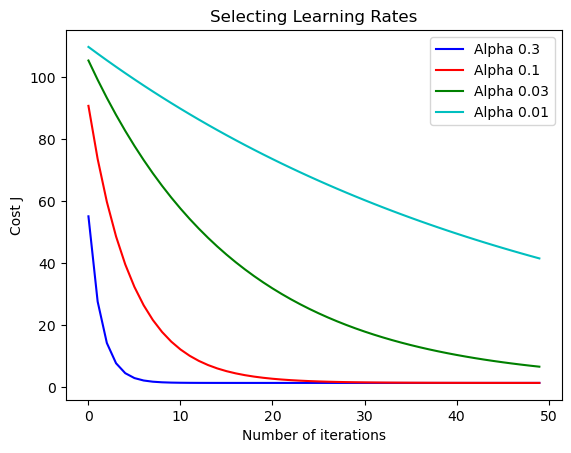

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1], 1)) # Look up X.shape -> (200, 4)
    theta, J_history = lr.gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label = 'Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Selecting Learning Rates')
plt.legend()
plt.show()

In [94]:
iterations = 250
alpha = 0.3
theta = np.zeros(shape=(X.shape[1], 1))
theta, _ = lr.gradient_descent(X, y, theta, alpha, iterations)

In [98]:
theta

array([[14.0225    ],
       [ 3.92908869],
       [ 2.79906919],
       [-0.02259517]])

In [99]:
theta[-3:, :]

array([[ 3.92908869],
       [ 2.79906919],
       [-0.02259517]])

In [97]:
new_data = [[0.051919, 1.214806, 1.283185]]
np.array(new_data).dot(theta[-3:, :])  # Prediction

array([[3.57532662]])

In [86]:
df2 = df[['TV', 'radio', 'newspaper', 'sales']]
df2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\diego\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\diego\AppData\Local\Temp\ipykernel_16604\2371908589.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


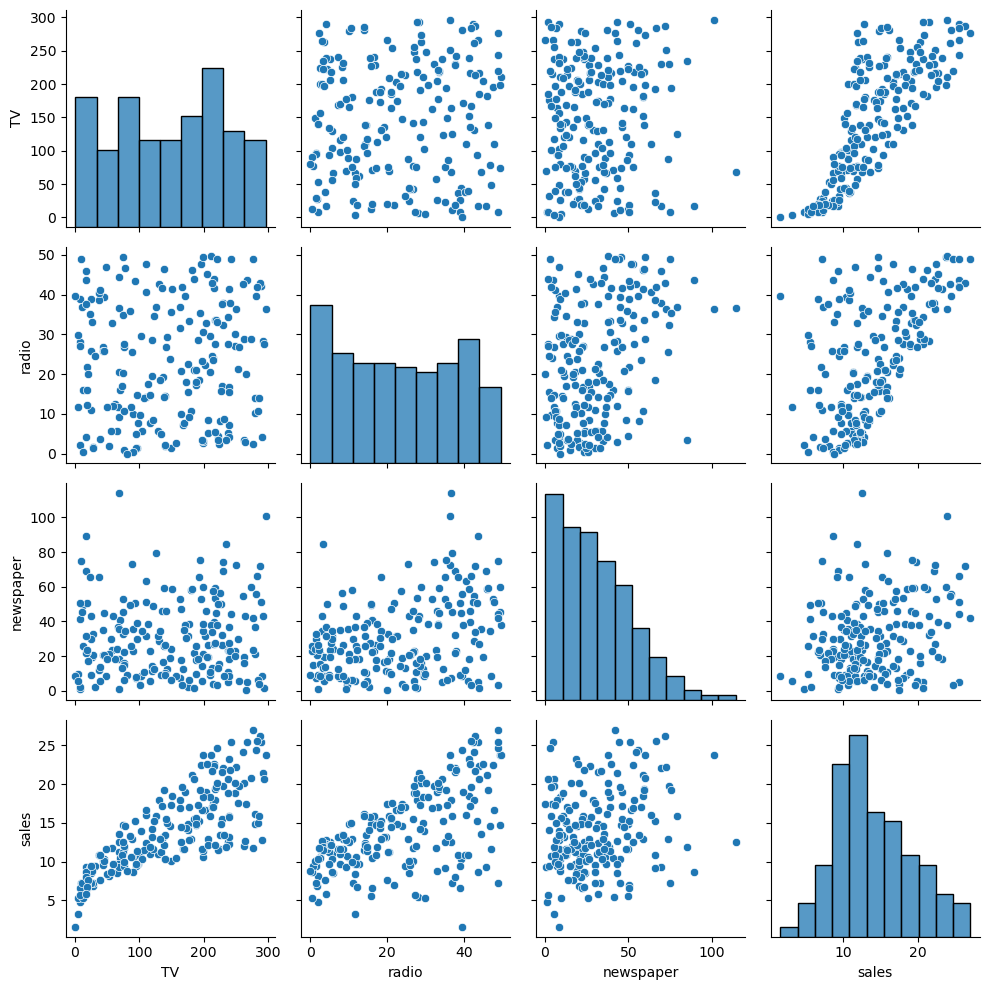

In [88]:
pair_plot = sns.pairplot(df2)
plt.tight_layout()
plt.show()
# Dot plots are Corelation charts

<Axes: >

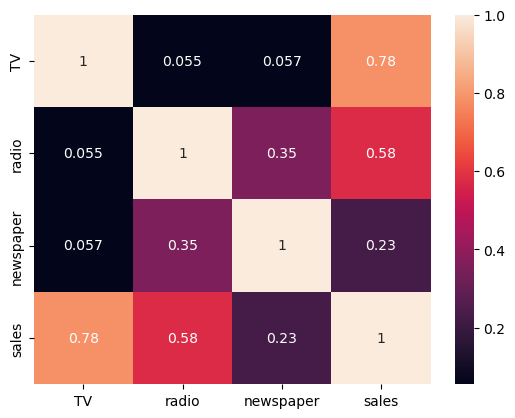

In [90]:
sns.heatmap(df2.corr(), annot=True)